In [1]:
import pybroker as pb
from pybroker import ExecContext
def buy_with_stop_loss(ctx:ExecContext):
    # 获取当前持有的股票头寸
    pos=ctx.long_pos()
    if not pos:
        # 设置全仓购买
        ctx.buy_shares=ctx.calc_target_shares(pb.param(name="percent"))
        ctx.hold_bars=100
    else:
        ctx.sell_shares=pos.shares
        # 设置止盈百分比,根据这个百分比自动卖出
        ctx.stop_profit_pct=pb.param(name="stop_profit_pct")
        

Loading bar data...
Loaded bar data: 0:00:01 

Backtesting: 2018-10-26 00:00:00 to 2024-11-04 00:00:00

Loading bar data...
Loaded bar data: 0:00:00 

Test split: 2018-10-26 00:00:00 to 2024-11-04 00:00:00


  0% (0 of 1461) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  4% (61 of 1461) |                      | Elapsed Time: 0:00:00 ETA:   0:00:01
  8% (131 of 1461) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:01
 14% (211 of 1461) |###                  | Elapsed Time: 0:00:00 ETA:   0:00:00
 19% (281 of 1461) |####                 | Elapsed Time: 0:00:00 ETA:   0:00:00
 24% (361 of 1461) |#####                | Elapsed Time: 0:00:00 ETA:   0:00:00
 29% (431 of 1461) |######               | Elapsed Time: 0:00:00 ETA:   0:00:00
 34% (501 of 1461) |#######              | Elapsed Time: 0:00:00 ETA:   0:00:00
 39% (581 of 1461) |########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 45% (671 of 1461) |#########            | Elapsed Time: 0:00:00 ETA:   0:00:00
 52% (761 of 1461) |##########           | Elapsed Time: 0:00:00 ETA:   0:00:00
 57% (841 of 1461) |############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 62% (911 of 1461) |#############       


Finished backtest: 0:00:08
总回报率为负，表明策略表现不佳，建议审视投资决策和策略；
最大回撤（百分比）控制得当，风险管理良好，投资策略相对稳健；
胜率在40%-50%之间，表明策略表现一般，需考虑优化交易决策；
夏普比率为负，表明风险调整后的收益不理想，需重新审视投资策略；
交易次数非常高，策略非常活跃，但需注意控制交易成本；
总手续费较低，有助于提高净收益，表明交易成本控制得当；
索提诺比率为负，表明下行风险调整后的收益不理想，需重新审视投资策略；
卡尔玛比率未知，无法评估收益与最大回撤的关系；
盈亏比略高于0，表明盈利和亏损相当，需考虑优化交易策略；
溃疡指数表现良好，低于5，表明投资组合的下行风险较低；
净值R²良好，超过0.5，说明投资组合的表现与基准有一定的相关性；



,cash,equity,margin,market_value,pnl,unrealized_pnl,fees,syl
date,,,,,,,,
2018-10-26,500000.00,500000.00,0.0,500000.00,0.00,0.0,0.0,0.000000
2018-10-29,5.96,494047.69,0.0,494047.69,-5952.31,0.0,0.0,-0.011905
2018-10-30,502289.35,502289.35,0.0,502289.35,2289.35,0.0,0.0,0.004579
2018-10-31,1.90,503665.48,0.0,503665.48,3665.48,0.0,0.0,0.007331
2018-11-01,503665.48,503665.48,0.0,503665.48,3665.48,0.0,0.0,0.007331
...,...,...,...,...,...,...,...,...
2024-10-29,455027.80,455027.80,0.0,455027.80,-44972.20,0.0,0.0,-0.089944
2024-10-30,9.58,451394.92,0.0,451394.92,-48605.08,0.0,0.0,-0.097210
2024-10-31,448670.26,448670.26,0.0,448670.26,-51329.74,0.0,0.0,-0.102659


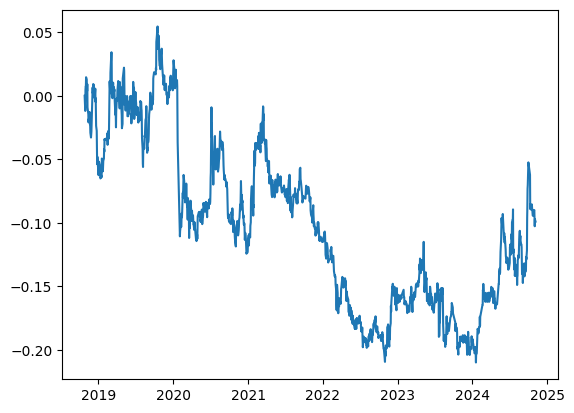

In [2]:
from unittest import result
import akshare
import pybroker as pb
from pybroker.scope import StaticScope as static
from pybroker import Strategy,StrategyConfig,YFinance,ExecContext
# pb.enable_data_source_cache('a_strategy')
from pybroker.ext.data import AKShare

import plot_utils
pb.param(name="stock_code",value="600000")
# 设置持仓比例为100%
static.instance().param(name="percent",value=1)
# 设置止损比例为10%
pb.param(name="stop_loss_pct",value="10")
# 设置止盈比例为10%
pb.param(name="stop_profit_pct",value="10")
akshare=AKShare()
df=akshare.query(symbols=[pb.param(name="stock_code")],start_date="20181026",end_date="20241104",adjust="hfq")
my_config=pb.StrategyConfig(initial_cash=500000)
strategy=Strategy(akshare,start_date="20181026",end_date="20241104",config=my_config)
strategy.add_execution(fn=buy_with_stop_loss,symbols=[pb.param(name="stock_code")])
result=strategy.backtest()
# import plot_utils
df=plot_utils.printResult(result.metrics_df.round(2))
result.portfolio['syl']=result.portfolio['market_value']/result.portfolio.iloc[0]["cash"]-1
plot_utils.plotChart(result)
df

In [7]:
result.orders

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,
1,buy,600000,2018-10-29,45787,NaN,10.92,0.0
2,sell,600000,2018-10-30,45787,NaN,10.97,0.0
3,buy,600000,2018-10-31,45871,NaN,10.95,0.0
4,sell,600000,2018-11-01,45871,NaN,10.98,0.0
5,buy,600000,2018-11-02,45375,NaN,11.10,0.0
...,...,...,...,...,...,...,...
1456,sell,600000,2024-10-29,44963,NaN,10.06,0.0
1457,buy,600000,2024-10-30,45411,NaN,10.02,0.0
1458,sell,600000,2024-10-31,45411,NaN,9.88,0.0


In [9]:
import plotly.graph_objects as go

# 假设 result 是你获得的回测对象
# 提取市场价值数据
market_value = result.portfolio['syl']
dates = result.portfolio.index

# 提取交易记录
buy_signals = result.orders[result.orders['type'] == 'buy']
sell_signals = result.orders[result.orders['type'] == 'sell']

# 创建图表
fig = go.Figure()

# 添加市场价值线图
fig.add_trace(go.Scatter(
    x=dates,
    y=market_value,
    mode='lines+markers',
    name='Market Value',
    line=dict(shape='spline')
))

# 添加买入点
fig.add_trace(go.Scatter(
    x=buy_signals.index,  # 买入的日期
    y=buy_signals['fill_price'],  # 买入的价格
    mode='markers',
    name='Buy Points',
    marker=dict(color='green', size=10, symbol='triangle-up'),
    text=['Buy'] * len(buy_signals),  # 提示信息
    textposition='top center'
))

# 添加卖出点
fig.add_trace(go.Scatter(
    x=sell_signals.index,  # 卖出的日期
    y=sell_signals['fill_price'],  # 卖出的价格
    mode='markers',
    name='Sell Points',
    marker=dict(color='red', size=10, symbol='triangle-down'),
    text=['Sell'] * len(sell_signals),  # 提示信息
    textposition='bottom center'
))

# 添加标题和标签
fig.update_layout(
    title='Portfolio Market Value Over Time with Buy/Sell Points',
    xaxis_title='Date',
    yaxis_title='Market Value',
    template='plotly_white'
)

# 展示图表
fig.show()
